
    Author: Wang Jinge
    Date: 3/12/2019
    for 695 machine learning homework2


In [20]:
#visualize the tree

import subprocess
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

def visualize_tree(tree, feature_names, fn="dt"):
    
    dotfile = fn + '.dot'
    pngfile = fn + '.png'

    with open(dotfile, 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    #     command = ["dot", "-Tpng", dotfile, "-o", pngfile]
    #     try:
    #         subprocess.check_call(command)
    #         print('ok')
    #     except:
    #         exit("Could not run dot, ie graphviz, "
    #              "to produce visualization")
    graph = pydotplus.graph_from_dot_file(dotfile)
    print(graph)
    graph.write_png(pngfile)
    Image(filename=pngfile, width=100, height=100)

In [21]:
import pandas as pd

titanic = pd.read_csv('Titanic.csv')  #load data
titanic.head()  #step1: observe a few samples

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null object
survived      1309 non-null int64
name          1309 non-null object
sex           1309 non-null object
age           1046 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
ticket        1309 non-null object
fare          1308 non-null float64
cabin         295 non-null object
embarked      1307 non-null object
boat          486 non-null object
body          121 non-null float64
home.dest     745 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [23]:
features = ['pclass', 'sex', 'age', 'sibsp']  #independent variables =‘pclass + sex + age + sibsp’
X = titanic[features]
y = titanic['survived']  #dependent variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
pclass    1309 non-null object
sex       1309 non-null object
age       1046 non-null float64
sibsp     1309 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB


In [24]:
#feature extraction

X['age'].fillna(X['age'].mean(), inplace=True)  #use the mean of 'age' to fill missing values.
#transform the categorical features('pclass' and 'sex') to numerical value
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
X = vec.fit_transform(X.to_dict(orient='record'))
print(vec.feature_names_)  #after transformation, num of features is 7

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male', 'sibsp']


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
##Take a random 70% samples for training, 30% for test

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [26]:
#step2: building a decision tree to predict

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
visualize_tree(dt, vec.feature_names_, fn='decision_tree')

In [27]:
#step3: the performance of the full model

from sklearn.metrics import classification_report
train_predict = dt.predict(x_train)
test_predict = dt.predict(x_test)
print(classification_report(train_predict, y_train, target_names=['in_sample_survivors', 'in_sample_fatalities']))
print(classification_report(test_predict, y_test, target_names=['out_sample_survivors', 'out_sample_fatalities']))

                      precision    recall  f1-score   support

 in_sample_survivors       0.95      0.87      0.91       630
in_sample_fatalities       0.76      0.91      0.83       286

         avg / total       0.90      0.88      0.89       916

                       precision    recall  f1-score   support

 out_sample_survivors       0.85      0.77      0.81       259
out_sample_fatalities       0.62      0.75      0.68       134

          avg / total       0.78      0.76      0.77       393



In [17]:
#step4: use cross‐validation to find the best parameter to prune the tree.

from sklearn.grid_search import GridSearchCV
dt_cv = DecisionTreeClassifier()
param_grid = {"max_leaf_nodes": [None, 2, 3, 4, 5, 6, 7, 8, 9]}
grid_search = GridSearchCV(dt_cv, param_grid=param_grid, cv=10)
grid_search.fit(X, y)
print('use cross‐validation to find the best parameter of tree size:', grid_search.best_params_ )

use cross‐validation to find the best parameter of tree size: {'max_leaf_nodes': 2}


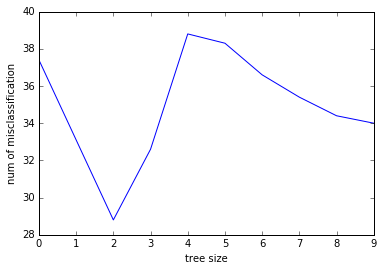

In [18]:
#Plot misclassification corresponding different tree size 

import matplotlib.pyplot as plt
%matplotlib inline
grid_len = len(grid_search.grid_scores_)
num_data = X.shape[0]
misclasses = []
for i in range(grid_len):
    #print(grid_search.grid_scores_[i][1])
    misclasses.append(num_data * (1 - grid_search.grid_scores_[i][1]) * 0.1)
#print(misclasses)
    
plt.plot([0, 2, 3, 4, 5, 6, 7, 8, 9], misclasses)
plt.xlabel('tree size')
plt.ylabel('num of misclassification')
plt.show()

In [19]:
#step5: prune the tree with the optimal tree size. Plot the pruned tree.

dt_pruned = grid_search.best_estimator_
dt_pruned.fit(x_train, y_train)
visualize_tree(dt_pruned, vec.feature_names_, fn='decision_tree_pruned')

In [27]:
#step6: reports on the final pruned tree

train_predict_pruned = dt_pruned.predict(x_train)
test_predict_pruned = dt_pruned.predict(x_test)
print(classification_report(train_predict_pruned, y_train, target_names=['in_sample_survivors', 'in_sample_fatalities']))
print(classification_report(test_predict_pruned, y_test, target_names=['out_sample_survivors', 'out_sample_fatalities']))

                      precision    recall  f1-score   support

 in_sample_survivors       0.85      0.81      0.83       599
in_sample_fatalities       0.67      0.72      0.69       317

         avg / total       0.78      0.78      0.78       916

                       precision    recall  f1-score   support

 out_sample_survivors       0.84      0.80      0.82       244
out_sample_fatalities       0.69      0.74      0.72       149

          avg / total       0.78      0.78      0.78       393

